## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "anime"
hashtag = "アニメ"
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
start = "2022-11-24T00:00+09:00"
end = "2022-11-24T23:59+09:00"
timespan = "24-24"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

In [4]:
#DF = df.copy()

In [5]:
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=15')
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
print(f"tau = {tau}")

tau = 95


In [6]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/anime/original/アニメ_24-24_95_aam


In [7]:
G.number_of_nodes()

12025

In [8]:
tb.check_degree(G)

singleton:[]


,degree
アニメ,12024
anime,5305
漫画,2858
manga,2210
イラスト,2117
...,...
今期見たやつ,1
ThrowbackTrack,1
斉木楠雄のψ難,1
ゆるの絵,1


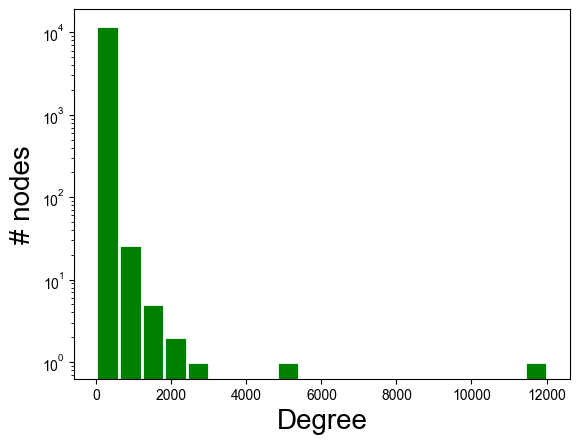

In [9]:
tb.plot_dd(G, 20)

In [10]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.629645002320181, 
its standard error sigma: 0.06006951174503484, 
k_min: 92.0


(2.629645002320181, 0.06006951174503484, 92.0)

In [11]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 0.0014505584088447736.


In [12]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.7989128272550032.


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.629645002320181, 
its standard error sigma: 0.06006951174503484, 
k_min: 92.0


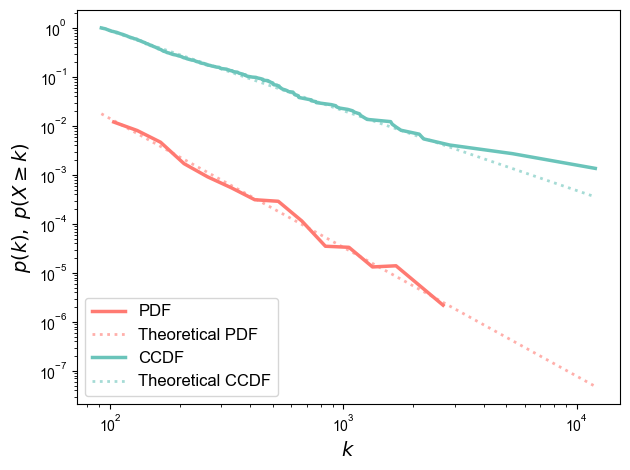

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

The following is for when the network created during the entire period is too large to draw the degree distribution (`3_modified_aam.ipynb`) due to lack of memory.

In [14]:
G.remove_node(hashtag)
print(f"Isolates after removal of the searchtag: \n{list(nx.isolates(G))}")
print("These isolate nodes are to be removed.")
G.remove_nodes_from(list(nx.isolates(G)))
assert len(list(nx.isolates(G))) == 0, "There is at least one isolate node left."
print("============================================")
print("The isolate nodes were successfully deleted.")

Isolates after removal of the searchtag: 
['ThrowbackTrack', '斉木楠雄のψ難', '하이큐', '幼馴染じゃ我慢できない', 'オーダーケーキ', 'ゆるの絵', 'umiaox8k', '今期見たやつ']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [15]:
tb.check_degree(G)

singleton:[]


,degree
anime,5304
漫画,2857
manga,2209
イラスト,2116
アニメ好きな人と繋がりたい,1768
...,...
毎日アニメ,1
湘南テアトロデラルテ,1
witch,1
映像研には手を出すな,1


In [16]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.6538880373134974, 
its standard error sigma: 0.061722553359944206, 
k_min: 93.0


(2.6538880373134974, 0.061722553359944206, 93.0)

In [17]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 7.102006283918912e-06.


In [18]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.933516009423366.


In [ ]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

In [ ]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

In [ ]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [19]:
# Save modified aam for statistical test
nx.write_graphml(G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')